# Guided Project: Popular Data Science Questions

Context: 

We are working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest. 
We need to figure out what is best content to write about. 

The question we are trying to answer is: "What is it that people want to learn about in data science?" 

Some of the resources we can use for this are Stack Overflow and [Stack Exchange](https://stackexchange.com/tour). There are quit a few Stack Exchange websites that are relevant to our goal: 
- [Data Science](https://datascience.stackexchange.com/)
- [Cross Validated](https://stats.stackexchange.com/)
- [Artificial Intelligence](https://ai.stackexchange.com/)
- [Mathematics](https://math.stackexchange.com/)
- [Stack Overflow](https://stackoverflow.com/)
- [Database Administrators](https://dba.stackexchange.com/)
- [Unix & Linux](https://unix.stackexchange.com/)
- [Software Engineering](https://softwareengineering.stackexchange.com/)




After investigating the website, we decided that we can use tags in categorizing content. We can take a look at the database schema [here](https://data.stackexchange.com/datascience/query/new).

Some other tables that might be interesting other than tags:
- Posts: includes information about Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount
- Users: includes information about views, upvotes/downvotes, user's reputation score, user's location
- Comments: score and content

The Posts table includes most of the informaiton we want that shows how popular the post is.
We're only interested in recent posts, so we'll limit our analysis to 2019.

We use this code to get our table:

SELECT Id, PostTypeId, CreationDate, Score, 
       ViewCount, Tags, AnswerCount, FavoriteCount

FROM posts
 
WHERE YEAR(CreationDate) = 2019

And we stored the information into a csv file: 2019_questions.csv

# Read the file into a dataframe

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

questions = pd.read_csv("2019_questions.csv", encoding="ISO-8859-1")

# Explore the data

In [42]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [43]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


We only have missing values in the FavoriteCount column and we are going to replace those with 0.

We should also change the type for some columns:
- CreationDate - from object to Datetime
- FavoriteCount - from float to int

We should also clean the Tags column, get rid of the "<>" and separate each tag with ",".

# Replace missing values with 0

In [44]:
questions["FavoriteCount"].fillna(0, inplace=True)

In [45]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0.0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0.0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0.0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0.0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0.0


# Change columns' type

questions["CreationDate"] = pd.to_datetime(questions["CreationDate"])

In [46]:
questions["FavoriteCount"] = questions["FavoriteCount"].apply(np.int64)

In [47]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: int64(5), object(2)
memory usage: 483.5+ KB


# Clean Tags column

In [48]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0


In [49]:
questions["Tags"].apply(lambda value: type(value)).unique()


array([<class 'str'>], dtype=object)

In [50]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")

In [51]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


# Determine the most popular tags

Count how many times each tag was used

In [52]:

tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
            
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
convnet,111
labels,28
probability,76
scipy,40
binary,26
nlg,9
finite-precision,2
label-flipping,1
bioinformatics,4
mlp,34


# Most used tags
Let's create a plot with top 20 most used tags

In [53]:

most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


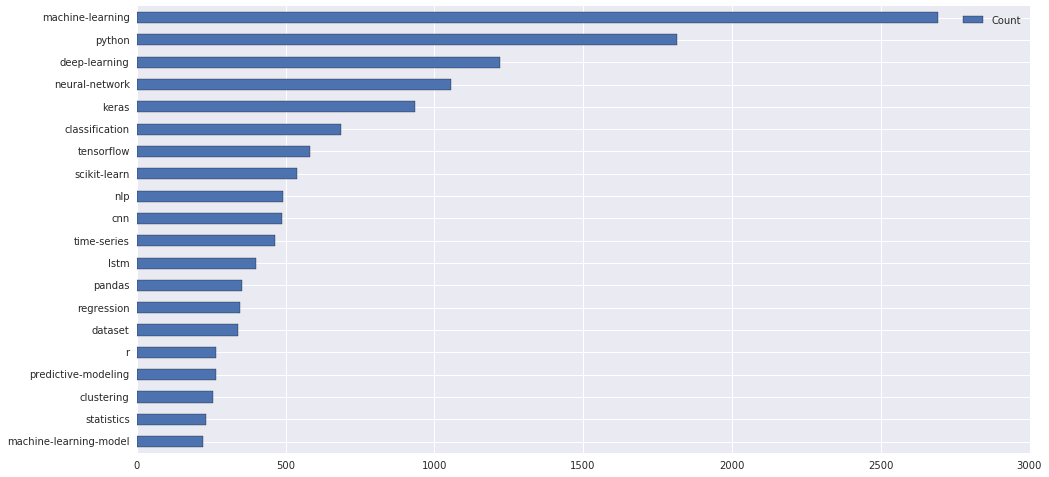

In [54]:
most_used.plot(kind="barh", figsize=(16,8))

# Count how many times each tag was viewed

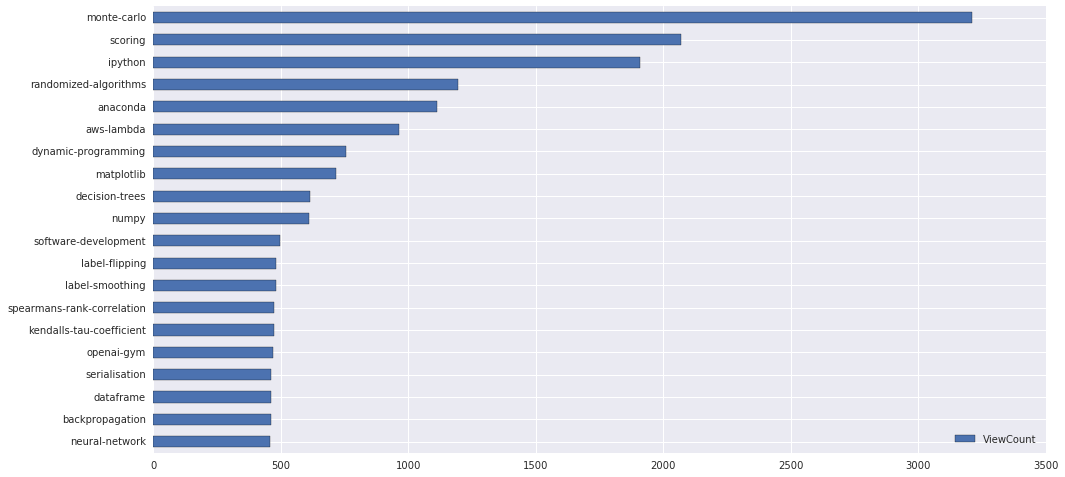

In [55]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] =+ row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']

tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient = "index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)
most_viewed.plot(kind="barh", figsize=(16,8))

            

# Create a side-by-side visualization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb648e092e8>],
      dtype=object)

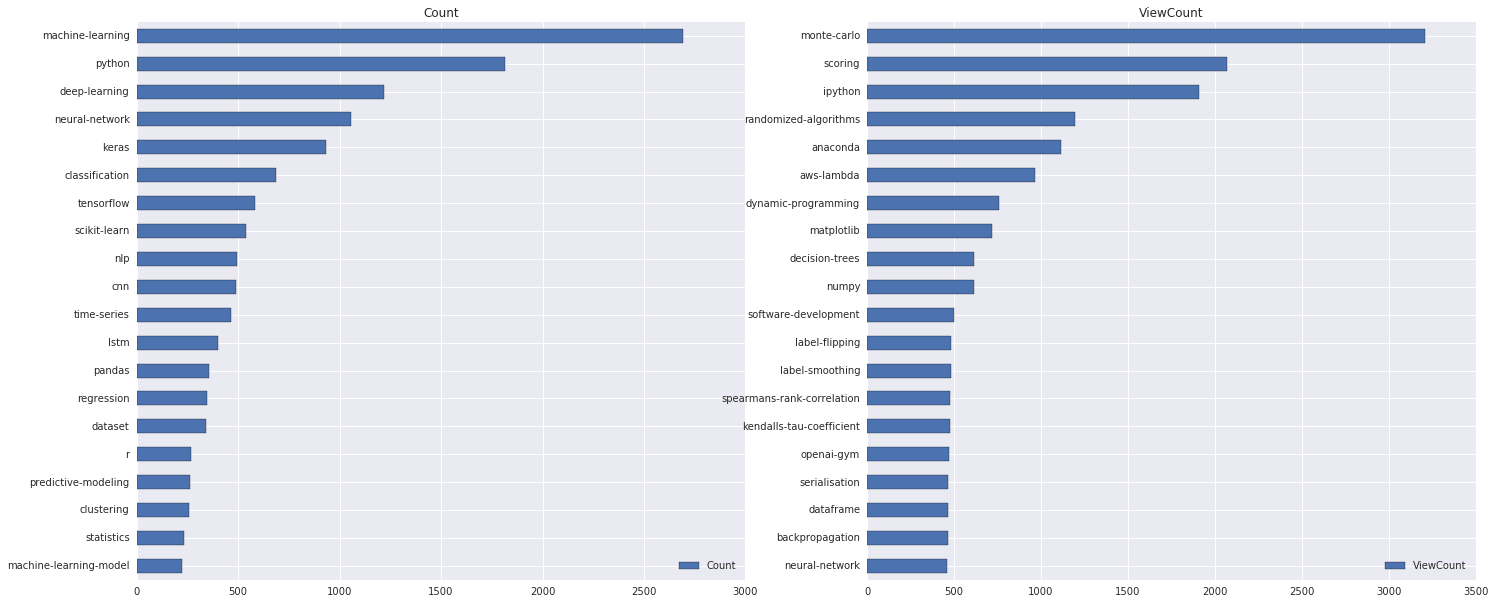

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24,10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

On the left side of the screen, we have the tags count - how many times each of the top 20 tags was used; and on the right, we have the view count of those tags - howmany times each tag was viewed. We can conclude that most top tags are present in both dataframes. 

# Check what tags are in one, but not in the other

In [57]:
in_used = pd.merge(most_used, most_viewed, how='left', left_index=True, right_index=True)

in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

Tags present in most_used, but not in most_viewed:
- machine-learning-model
- statistics
- predictive-modeling
- r

Tags present in most_viewed, but not in most_used:
- csv
- pytorch
- dataframe

# Check how tags are related, find relationships between pair of tags

Count how many times each pair appears together and create a dataframe where each row/column represents one tag.

In [58]:
all_tags = list(tag_count.index)

In [59]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,convnet,labels,probability,scipy
convnet,NaN,NaN,NaN,NaN
labels,NaN,NaN,NaN,NaN
probability,NaN,NaN,NaN,NaN
scipy,NaN,NaN,NaN,NaN


Will fill all rows with 0 at first, and then add 1 ech time we find a relation.


In [60]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

Let's take a look at the most used tags.

In [62]:

relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


For a more visual understanding, let's create a heatmap.

In [63]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

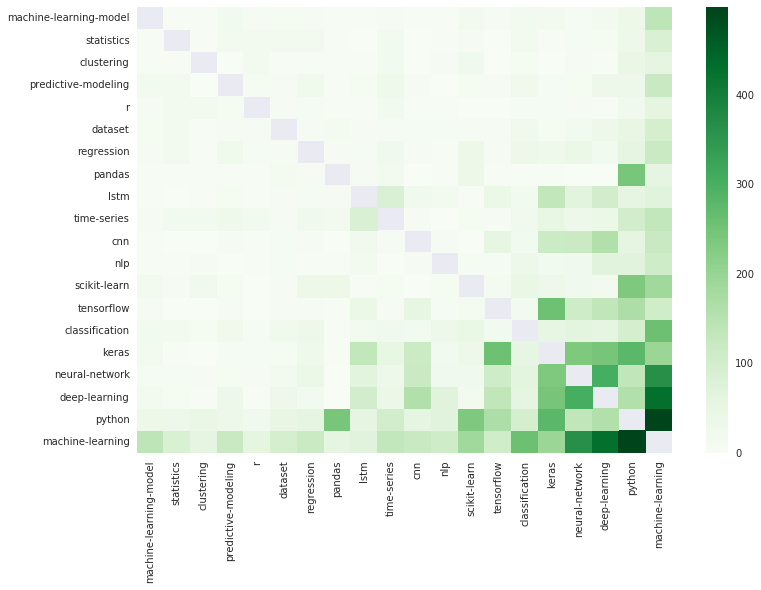

In [64]:

plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

Top 10 tags include python, machine_learning, deep-learning, neural-network, keras, tensorflow, classification, scikit_learn. Most of them are related to machine-learning, deep-learning, so we could already conclude that the most "hot" topic in our case is deep-learning.

# Track the interest in deep learning across time

- Count how many deep learning questions are asked per period
- Total amount of questions per time period
- How many deep learning questions ther are relative to the total amount of questions per time period

In [67]:
all_questions = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

In [68]:
all_questions["Tags"] = all_questions["Tags"].str.replace("^<|>$", "").str.split("><")

We'll create a list of tags that we consider as part of the deep learning topic:
["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]

And then, we build a function that assigns 1 to deep learning tags and 0 to others.

In [69]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [70]:
all_questions["DeepLearning"] = all_questions["Tags"].apply(class_deep_learning)
all_questions.sample(5)


,Id,CreationDate,Tags,DeepLearning
1821,25268,2017-11-30 19:57:04,"[machine-learning, python, visualization, pand...",0
3858,26180,2018-01-01 01:58:56,[loss-function],0
17811,54112,2019-06-20 00:04:10,"[machine-learning, data-cleaning, feature-engi...",0
9262,49498,2019-04-17 20:49:35,"[python, gpu, kaggle, google, colab]",0
17026,45409,2019-02-11 20:37:03,"[python, tensorflow, gradient-descent]",1


# Create quarterly tracker
We don't have enough data for 2020, so we will exclude that year.

In [71]:
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2020]

In [72]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_questions["Quarter"] = all_questions["CreationDate"].apply(fetch_quarter)

In [73]:
all_questions.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


Group by quarter, count the number of deep learning questions, total number of questions and the ratio.

In [78]:
quarterly = all_questions.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
4,15Q2,28,284,0.098592
22,19Q4,809,2036,0.397348
2,14Q4,21,216,0.097222
19,19Q1,804,1987,0.404630
12,17Q2,226,647,0.349304


Let's make it more visual

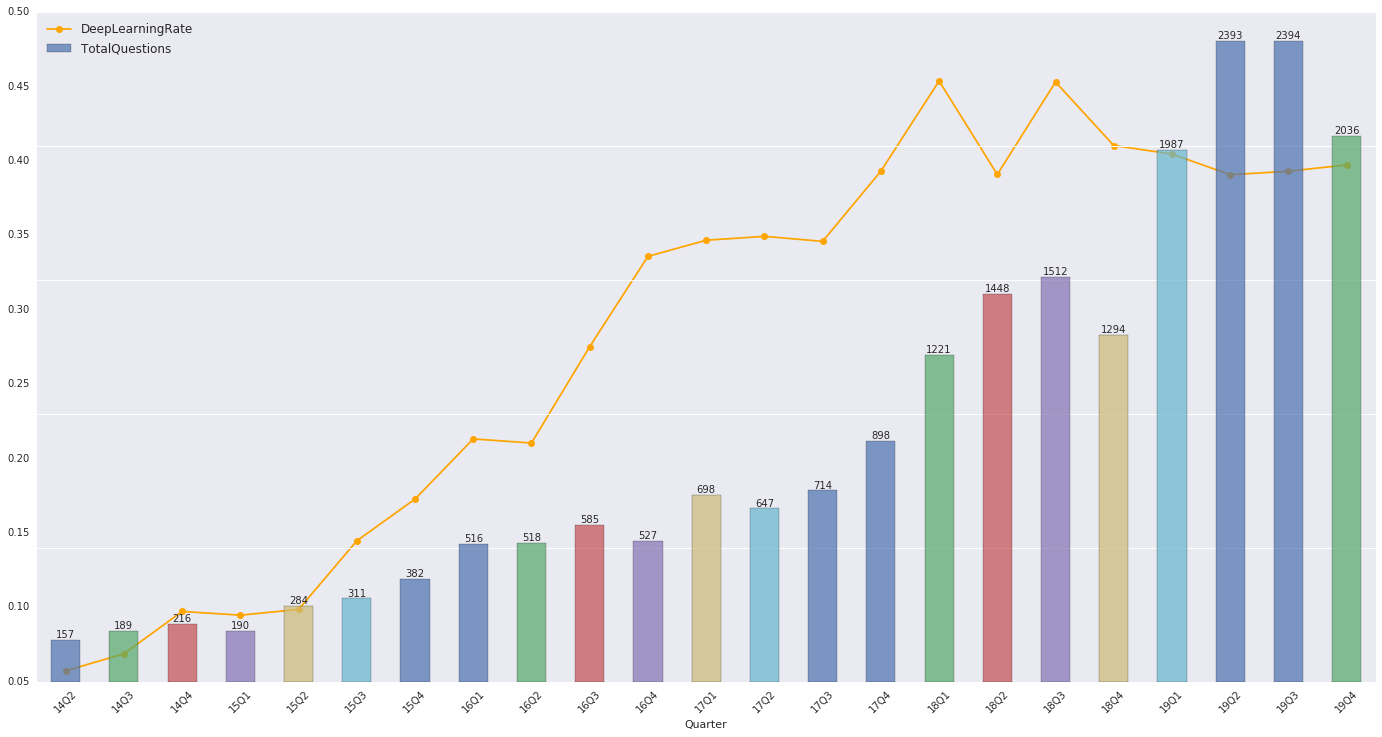

In [79]:

ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

Deep learning was a very trending topic in the data science stack exchange from the begining. Even if it is not trending now, but it hit a plateau, it doesn't seem that the interest in the topic is decreasing.

In conclusion, to answer the question we asked in the beginning: What is it that people want to learn about in data science? we could safely say that Deep Learning is a good topic to choose and recommend to the company to create content in the future.